In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import mnist

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [12]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

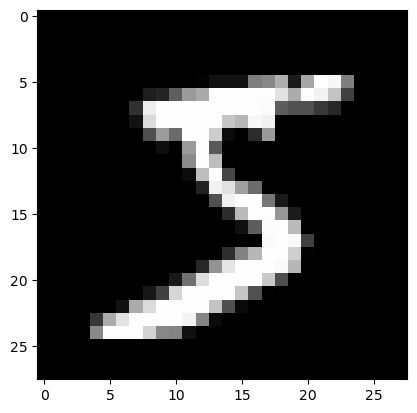

In [15]:
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.show()

In [17]:
nb_model = GaussianNB()

In [19]:
fit_nb = nb_model.fit(x_train, y_train)

In [21]:
predictions = fit_nb.predict(x_test)
con_matrix = confusion_matrix(y_test, predictions)
print(con_matrix)

[[ 870    0    3    5    2    5   31    1   35   28]
 [   0 1079    2    1    0    0   10    0   38    5]
 [  79   25  266   91    5    2  269    4  271   20]
 [  32   39    6  353    2    3   51    8  409  107]
 [  19    2    5    4  168    7   63    7  210  497]
 [  71   25    1   20    3   44   40    2  586  100]
 [  12   12    3    1    1    7  895    0   26    1]
 [   0   15    2   10    5    1    5  280   39  671]
 [  13   72    3    7    3   11   12    4  648  201]
 [   5    7    3    6    1    0    1   13   18  955]]


In [23]:
#con matrix plot
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [25]:
accuracy = metrics.accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
print(f'Accuracy %: {accuracy*100}%')

Accuracy: 0.5558
Accuracy %: 55.58%


In [27]:
def diagonal_sum(con_matrix):
    sum = 0
    for i in range(10):
        for j in range(10):
            if i == j:
                sum += con_matrix[i][j]
    return sum


In [29]:
sum = diagonal_sum(con_matrix)
print(sum)
print(f'Accuracy %: {sum/100}')

5558
Accuracy %: 55.58


Confusion matrix, without normalization
Normalized confusion matrix


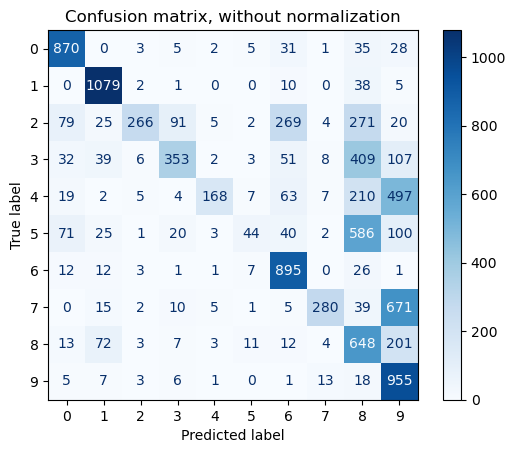

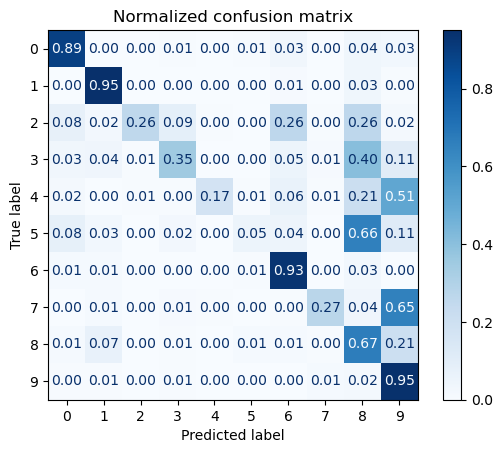

In [31]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    values_format = ".2f" if normalize == "true" else None
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test,
        predictions,
        cmap='Blues',
        normalize=normalize,
        values_format=values_format
    )
    disp.ax_.set_title(title)

    print(title)
    # print(disp.confusion_matrix)

plt.show()